In [2]:
# Import Essential Libraries
import os
from PIL import Image
import cv2
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')

100%|██████████| 6.25M/6.25M [00:00<00:00, 8.13MB/s]



image 1/1 /Users/dilaraorazmetova/cars/_al_nomer25960140/real_25957743.jpg: 512x640 1 car, 79.5ms
Speed: 4.0ms preprocess, 79.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


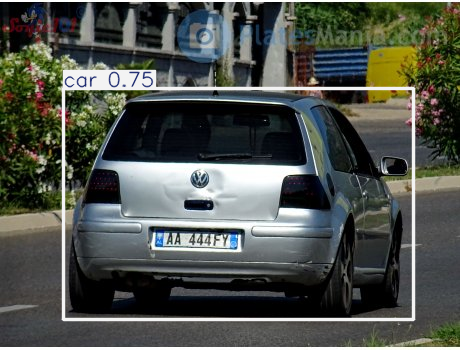

In [4]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/Users/dilaraorazmetova/cars/_al_nomer25960140/real_25957743.jpg"
result_predict = model.predict(source = image, imgsz=(640))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


In [22]:
import shutil
from sklearn.model_selection import train_test_split

dataset = '/Users/dilaraorazmetova/cars/model-dataset'
im_dir = '/Users/dilaraorazmetova/cars/images'

type_count = {
    '1': 200,
    '2': 10,
    '3': 30,
    '4': 70
}
for type_dir in os.listdir(im_dir):
    if not os.path.isdir(os.path.join(im_dir, type_dir)):
        continue
    cnt_type = type_count[type_dir.split('-')[-1]]
    numbers = list(range(cnt_type))

    train_val_data, test_data = train_test_split(numbers, test_size=0.1, random_state=42)
    train_data, val_data = train_test_split(train_val_data, test_size=0.12, random_state=42)  # 0.1765 ≈ 15%/(100%-15%)

    car_dir = os.path.join(im_dir, type_dir)
    car_ids = os.listdir(car_dir)

    data = {
        'train': train_data,
        'val': val_data,
        'test': test_data
    }
    for dir_name in data:
        for cnt in data[dir_name]:
            car_id = car_ids[cnt]
            img_name = 'real_' + car_id.split('nomer')[-1] + '.jpg'
            img_src = os.path.join(car_dir, car_id, img_name)
            img_dst = os.path.join(dataset, dir_name, img_name)
            shutil.copy(img_src, img_dst)


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="datasets/data.yaml",epochs = 50, batch = -1, optimizer = 'auto')


Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/datasets/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /content/drive/MyDrive/datasets/train/labels.cache... 243 images, 2 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/datasets/val/labels.cache... 36 images, 1 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        10G      1.808      4.933      1.545         12        640: 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:20<00:00, 20.24s/it]

                   all         37         36    0.00036      0.111     0.0002   4.92e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.98G      1.886      4.915      1.601         14        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         37         36    0.00108      0.333   0.000789   0.000366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        10G      1.319      4.008      1.146          8        640: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         37         36    0.00315      0.972    0.00677    0.00397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        10G      1.117      2.367     0.9819         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         37         36    0.00297      0.917     0.0736     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        10G      1.121      2.156     0.9562          6        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         37         36    0.00297      0.917     0.0132    0.00547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        10G      1.006      1.958     0.9166          9        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         37         36    0.00306      0.944      0.616      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        10G      1.034      1.628     0.8938         13        640: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         37         36    0.00315      0.972    0.00913     0.0055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        10G     0.9918      1.639     0.9101          9        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         37         36     0.0421      0.722      0.708       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        10G     0.9444      1.386     0.8936          6        640: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         37         36    0.00315      0.972      0.497      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        10G     0.9736      1.438     0.9314          6        640: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         37         36    0.00315      0.972      0.383      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        10G     0.9066      1.378     0.9082          7        640: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         37         36    0.00315      0.972      0.232      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        10G     0.9305      1.336     0.9294         10        640: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         37         36    0.00306      0.944     0.0337     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        10G     0.9751      1.215      0.904         10        640: 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         37         36    0.00306      0.944      0.185      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        10G      1.021      1.289     0.9344          8        640: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         37         36       0.34      0.472      0.318      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        10G     0.9374      1.303     0.8889          4        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         37         36          1       0.44      0.632      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        10G      1.018      1.165     0.9183         11        640: 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         37         36      0.762      0.278      0.429      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        10G      1.048      1.216     0.9481          9        640: 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         37         36      0.896      0.239      0.443      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        10G      1.104      1.153     0.9339         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         37         36          1      0.133      0.511      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        10G     0.9231      1.027     0.9057         14        640: 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         37         36          1      0.264      0.702      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        10G     0.9801      1.072     0.9226         10        640: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         37         36          1      0.244      0.716      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        10G     0.9816      1.056      0.917         12        640: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         37         36          1      0.618      0.822      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        10G     0.9676      1.032      0.916          9        640: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         37         36          1      0.631      0.838      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        10G     0.9903     0.9749     0.9171         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         37         36          1      0.677      0.781      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        10G     0.9155     0.9574     0.9149          8        640: 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         37         36      0.963       0.73      0.848      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        10G     0.9819     0.9527     0.9051         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         37         36       0.93      0.738      0.806      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        10G     0.9041      0.892     0.9167          8        640: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         37         36      0.952      0.833      0.873      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        10G     0.9565     0.8738     0.9194          8        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         37         36      0.995      0.833      0.914      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        10G     0.9764     0.8795     0.9232         11        640: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         37         36      0.939      0.858      0.932      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        10G     0.9394     0.8177     0.9235          9        640: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         37         36      0.965      0.861      0.887      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        10G     0.9188     0.8198     0.9386          7        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         37         36      0.938      0.778      0.898      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        10G     0.8719     0.8121     0.9198         12        640: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         37         36       0.93      0.917      0.938      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        10G     0.8986     0.8019     0.8917          9        640: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         37         36       0.97      0.901      0.974      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        10G      0.861     0.7571     0.8927          7        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         37         36      0.971      0.938       0.98      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        10G      0.835     0.7384      0.876          7        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         37         36      0.971      0.943       0.98       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        10G     0.8576     0.7196     0.8891         14        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         37         36      0.991      0.889      0.965      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        10G      0.772      0.684     0.8845          9        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         37         36      0.941      0.917       0.95      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        10G      0.707     0.6639     0.8365          4        640: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         37         36      0.958      0.889      0.963      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        10G     0.8231     0.6871      0.861         10        640: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         37         36      0.955      0.917      0.975      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        10G     0.7675     0.6452     0.8767          8        640: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         37         36      0.921      0.972      0.982      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        10G      0.763     0.6444     0.8626          7        640: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         37         36      0.919      0.972      0.982       0.69


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        10G     0.8235     0.7535     0.8704          5        640: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         37         36      0.975      0.889      0.982      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        10G     0.8163     0.7631     0.9108          5        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         37         36      0.942      0.944      0.984      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        10G     0.7645     0.6738     0.8559          5        640: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         37         36      0.987      0.917      0.979       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        10G     0.7989     0.6988     0.8693          5        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         37         36          1      0.915      0.978      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        10G     0.7362     0.6542     0.8781          5        640: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         37         36      0.996      0.917      0.986      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        10G     0.7468     0.6329     0.8447          5        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         37         36      0.996      0.917      0.987      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        10G      0.697     0.6374     0.8414          4        640: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         37         36          1      0.931       0.99      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        10G     0.6197     0.6027     0.8504          6        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         37         36          1      0.934      0.991      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        10G     0.6765     0.5941     0.8374          4        640: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         37         36      0.972      0.944      0.992      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        10G     0.6101     0.5565     0.8417          5        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         37         36      0.972      0.951      0.993      0.742



50 epochs completed in 0.090 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


                   all         37         36      0.971      0.945      0.992      0.747
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /Users/dilaraorazmetova/cars/images/al-ctype-3/_al_nomer25465654/real_25465654.jpg: 512x640 1 license-plate, 67.3ms
Speed: 1.8ms preprocess, 67.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'license-plate'}
obb: None
orig_img: array([[[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [254, 255, 253],
        [253, 254, 252],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[112, 113, 111],
        [111, 112, 110],
        [111, 112, 110],
        ...,
        [217, 213, 212],
        [217, 213, 212],
        [217, 213, 212]],

       ...,

       [[245, 247, 247],
        [253, 255, 255],
        [253, 255, 255],
        ..

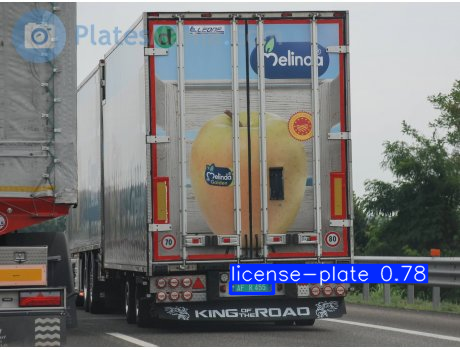

In [15]:
# Use a pretrained YOLOv8n model
Valid_model = YOLO('runs/detect/train/weights/best.pt')

# Use the model to detect object
image = "/Users/dilaraorazmetova/cars/images/al-ctype-3/_al_nomer25465654/real_25465654.jpg"
result_predict = Valid_model.predict(source = image, imgsz=(640))
print(result_predict[0])

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


In [ ]:
# Export the model
Valid_model.export(format='onnx')